In [ ]:
#0 loading prerequesites 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
#1 loading data

df = pd.read_csv('yeast.csv') 
X = df.drop(['name'], axis=1)
y = df['name']

In [ ]:
# 2. Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



In [ ]:
# 4. Iterate through different depths
depths = range(1, 21)
accuracy_scores = []
f1_macro_scores = []

print("Testing different depths...")
for d in depths:
    # We keep min_samples_split=10 to ensure branches aren't based on tiny samples
    model = DecisionTreeClassifier(
        criterion='entropy', 
        max_depth=d, 
        min_samples_split=10, 
        random_state=69
    )
    
    # average scores across 5 folds
    acc = cross_val_score(model, X, y_encoded, cv=skf, scoring='accuracy').mean()
    f1 = cross_val_score(model, X, y_encoded, cv=skf, scoring='f1_macro').mean()
    
    accuracy_scores.append(acc)
    f1_macro_scores.append(f1)
    print(f"Depth {d}: Accuracy = {acc:.4f}, F1-Macro = {f1:.4f}")

Testing different depths...
Depth 1: Accuracy = 0.4070, F1-Macro = 0.1208
Depth 2: Accuracy = 0.4420, F1-Macro = 0.2292
Depth 3: Accuracy = 0.5000, F1-Macro = 0.3482
Depth 4: Accuracy = 0.5660, F1-Macro = 0.4158
Depth 5: Accuracy = 0.5661, F1-Macro = 0.4301
Depth 6: Accuracy = 0.5762, F1-Macro = 0.4334
Depth 7: Accuracy = 0.5667, F1-Macro = 0.4301
Depth 8: Accuracy = 0.5620, F1-Macro = 0.4206
Depth 9: Accuracy = 0.5600, F1-Macro = 0.4229
Depth 10: Accuracy = 0.5539, F1-Macro = 0.4123
Depth 11: Accuracy = 0.5519, F1-Macro = 0.4179
Depth 12: Accuracy = 0.5465, F1-Macro = 0.4144
Depth 13: Accuracy = 0.5451, F1-Macro = 0.4093
Depth 14: Accuracy = 0.5425, F1-Macro = 0.4121
Depth 15: Accuracy = 0.5384, F1-Macro = 0.4100
Depth 16: Accuracy = 0.5384, F1-Macro = 0.4083
Depth 17: Accuracy = 0.5377, F1-Macro = 0.4097
Depth 18: Accuracy = 0.5391, F1-Macro = 0.4091
Depth 19: Accuracy = 0.5418, F1-Macro = 0.4107
Depth 20: Accuracy = 0.5404, F1-Macro = 0.4102


In [ ]:
# 5. Finding best depth
best_depth = depths[np.argmax(accuracy_scores)]
print(f"\nBest Depth based on Accuracy: {best_depth}")


Best Depth based on Accuracy: 6


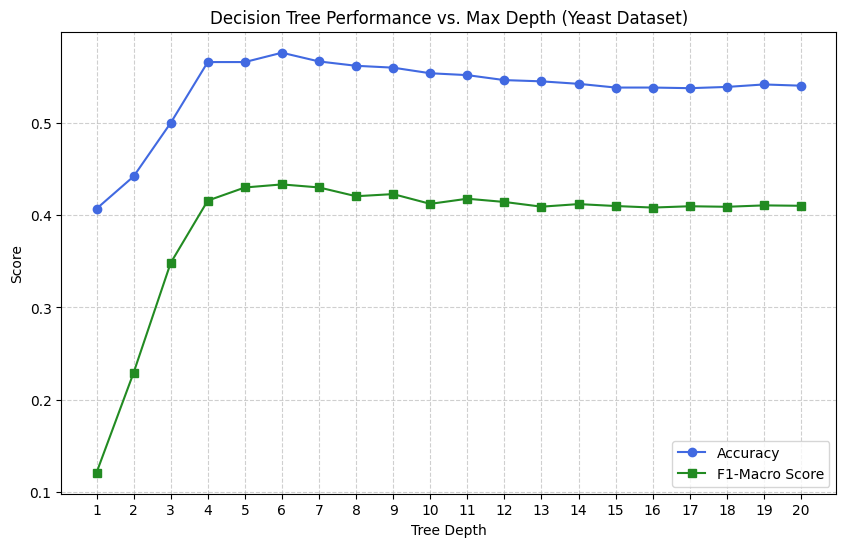

In [ ]:
# 6. Performance Plot
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy_scores, label='Accuracy', marker='o', color='royalblue')
plt.plot(depths, f1_macro_scores, label='F1-Macro Score', marker='s', color='forestgreen')

plt.title('Decision Tree Performance vs. Max Depth (Yeast Dataset)')
plt.xlabel('Tree Depth')
plt.ylabel('Score')
plt.xticks(depths)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

In [9]:
# Save the visualization for your report
plt.savefig('yeast_depth_analysis.png')
print("Plot saved as 'yeast_depth_analysis.png'")

Plot saved as 'yeast_depth_analysis.png'


<Figure size 640x480 with 0 Axes>

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, matthews_corrcoef, classification_report
from sklearn.preprocessing import LabelEncoder

redoing the classification and generating more performance parameters 
repetition could be avoided in next version of code 

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Initialization
dt_model = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=best_depth,  # Prevents the tree from becoming too complex
    min_samples_split=10,  # before this parameter was creating problems 
    random_state=69
)

# 4. 5-Fold Stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = cross_val_score(dt_model, X, y_encoded, cv=skf, scoring='f1_macro')
mcc_scores = []

for train_index, test_index in skf.split(X, y_encoded):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y_encoded[train_index], y_encoded[test_index]
    
    dt_model.fit(X_train_cv, y_train_cv)
    y_pred_cv = dt_model.predict(X_test_cv)
    mcc_scores.append(matthews_corrcoef(y_test_cv, y_pred_cv))

print(f"--- Tuned Yeast Dataset Performance ---")
print(f"Average F1 Score (Macro): {np.mean(f1_scores):.4f}")
print(f"Average MCC: {np.mean(mcc_scores):.4f}\n")

# 5. Final Report
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

dt_model.fit(X_train, y_train)
final_pred = dt_model.predict(X_test)

labels_in_test = np.unique(np.concatenate((y_test, final_pred)))
target_names_in_test = le.inverse_transform(labels_in_test)

print("--- Detailed Classification Report ---")
print(classification_report(
    y_test, 
    final_pred, 
    labels=labels_in_test, 
    target_names=target_names_in_test,
    zero_division=0
))

--- Tuned Yeast Dataset Performance ---
Average F1 Score (Macro): 0.4334
Average MCC: 0.4561

--- Detailed Classification Report ---
              precision    recall  f1-score   support

         CYT       0.49      0.72      0.58        93
         ERL       1.00      1.00      1.00         1
         EXC       0.50      0.14      0.22         7
         ME1       0.75      0.67      0.71         9
         ME2       0.33      0.40      0.36        10
         ME3       0.79      0.81      0.80        32
         MIT       0.62      0.59      0.60        49
         NUC       0.56      0.35      0.43        86
         POX       1.00      0.25      0.40         4
         VAC       1.00      0.17      0.29         6

    accuracy                           0.56       297
   macro avg       0.70      0.51      0.54       297
weighted avg       0.58      0.56      0.55       297



Tried other optimizations that gave slightly better mcc score but the prescision of VAC parameter became zero 